In [43]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(url)

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

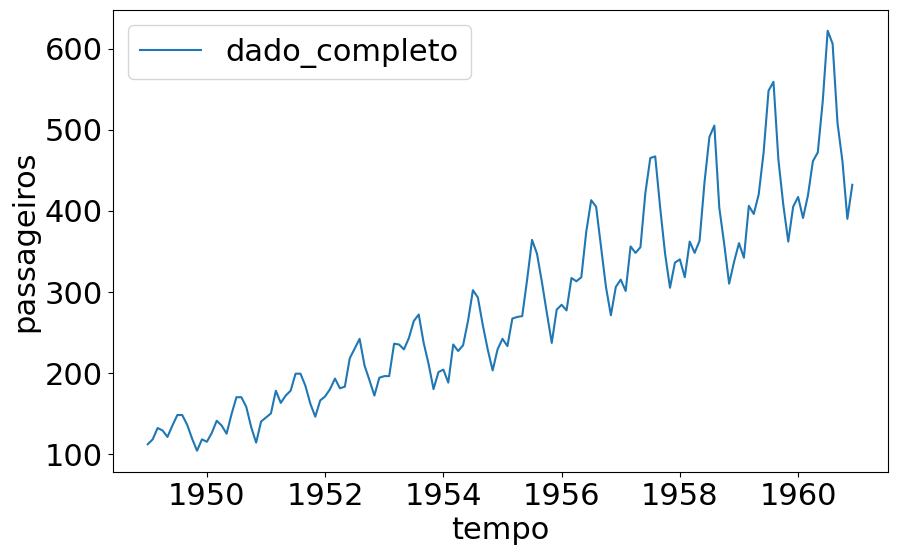

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
x = dado_escalado[:, 0]
y = dado_escalado[:, 1]

Text(0.5, 0, 'Data')

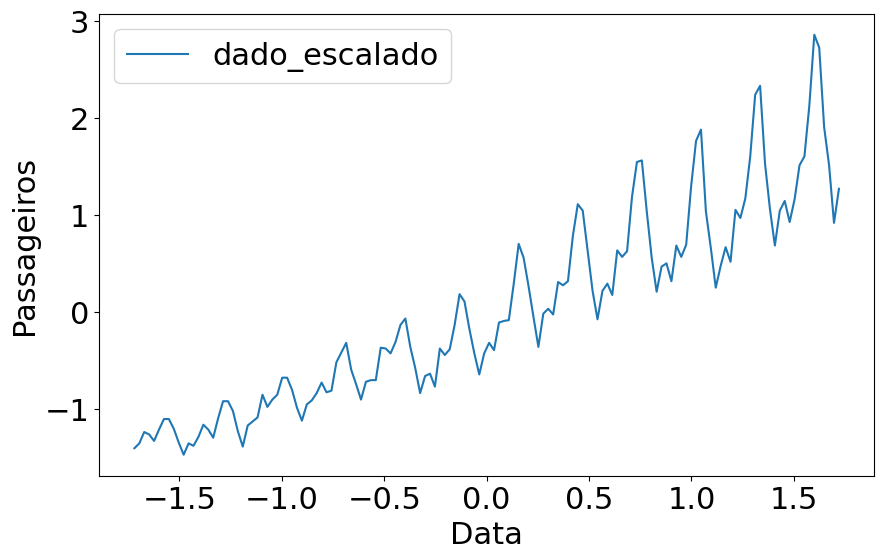

In [9]:
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [10]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)- tamanho_treino

In [11]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [12]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

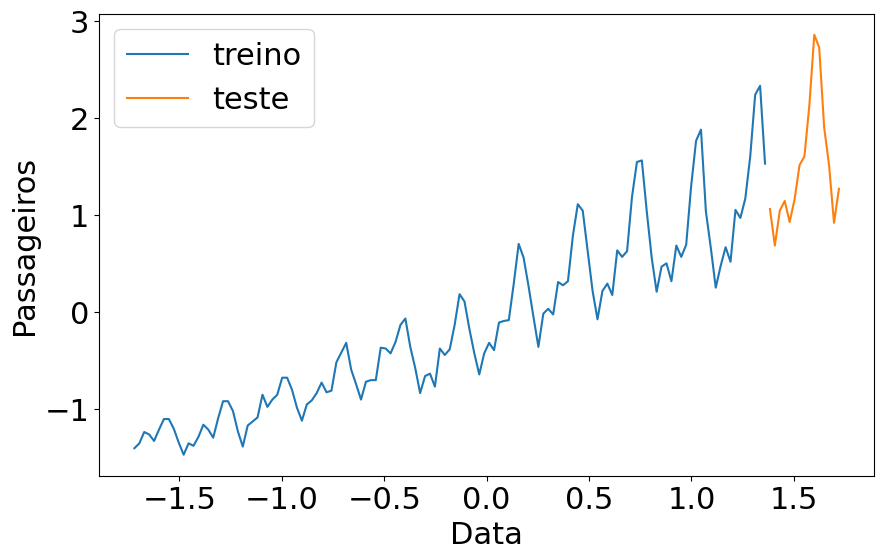

In [13]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [14]:
regressor = Sequential()

In [15]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [16]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 0s 5ms/step - loss: 0.1284


In [19]:
y_predict = regressor.predict(x_treino)

5/5 [==============================] - 0s 3ms/step


<Axes: >

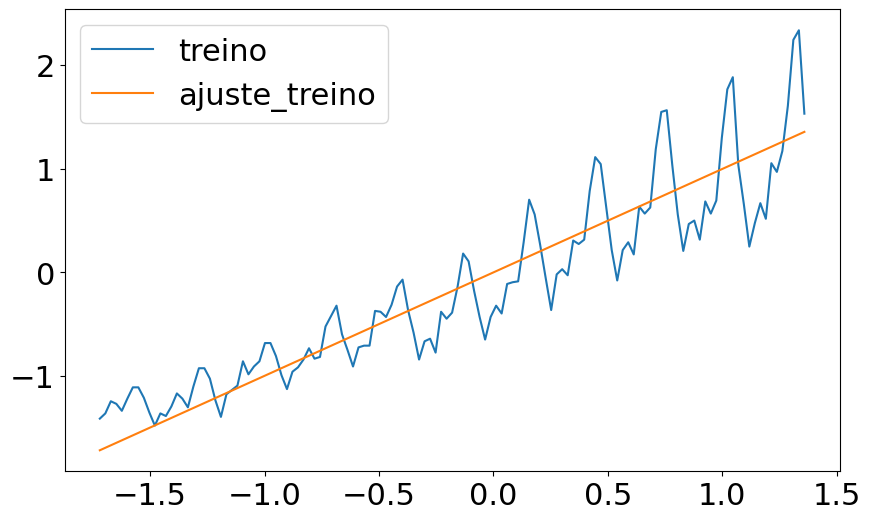

In [20]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:, 0], label='ajuste_treino')

In [21]:
d ={'tempo': x_treino, 'passageiros': y_predict[:, 0]}

In [22]:
resultados = pd.DataFrame(data=d)

In [23]:
resultados

,tempo,passageiros
0,-1.720064,-1.712525
1,-1.696007,-1.688574
2,-1.671950,-1.664622
3,-1.647894,-1.640671
4,-1.623837,-1.616719
...,...,...
124,1.262984,1.257449
125,1.287041,1.281400
126,1.311098,1.305351
127,1.335155,1.329303


In [24]:
resultado_transf = sc.inverse_transform(resultados)

In [25]:
resultado_transf = pd.DataFrame(resultado_transf)

In [26]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

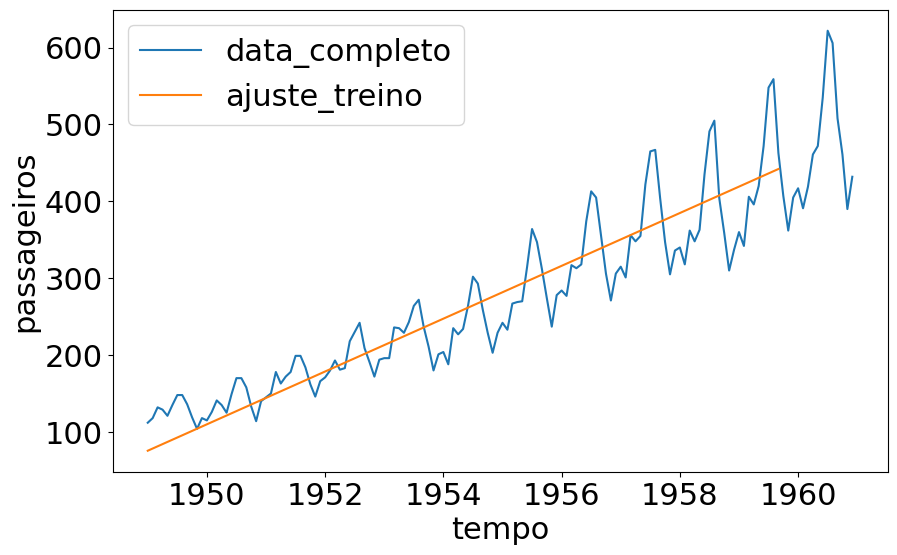

In [27]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='data_completo')
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf, label='ajuste_treino')

In [28]:
y_predict_teste = regressor.predict(x_teste)

1/1 [==============================] - 0s 24ms/step


In [29]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:, 0]}
resultados_teste = pd.DataFrame(data=d)

In [30]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [31]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [32]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

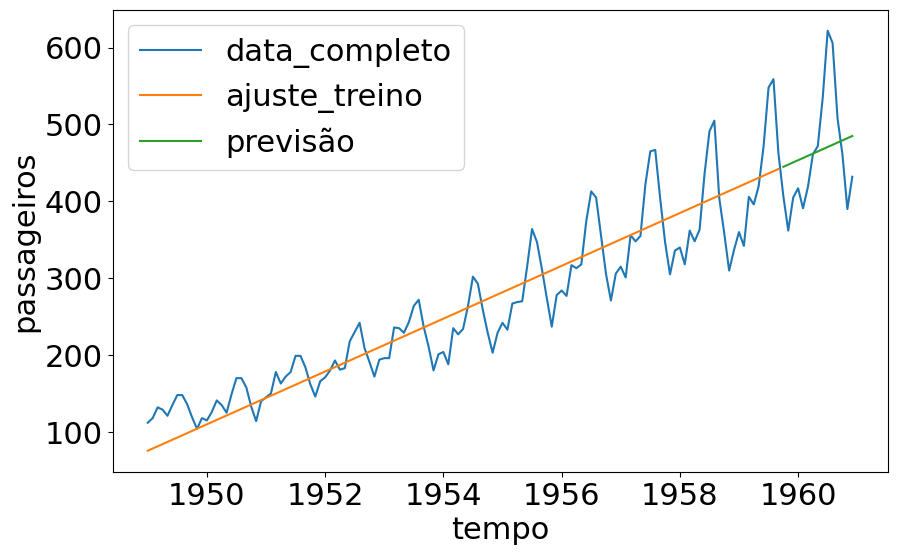

In [33]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='data_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [34]:
regressor2 = Sequential()

In [35]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [36]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 7ms/step - loss: 0.7996
Epoch 2/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7971
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7968
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7955
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7935
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7914
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7890
Epoch 8/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7881
Epoch 9/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7864
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7860
Epoch 11/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7855
Epoch 12/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7846
Epoch 13/500
5/5 [==============================] - 0s 10m

In [39]:
y_predict = regressor2.predict(x_treino)

5/5 [==============================] - 0s 3ms/step


In [40]:
y_predict_teste = regressor2.predict(x_teste)

1/1 [==============================] - 0s 24ms/step


<Axes: >

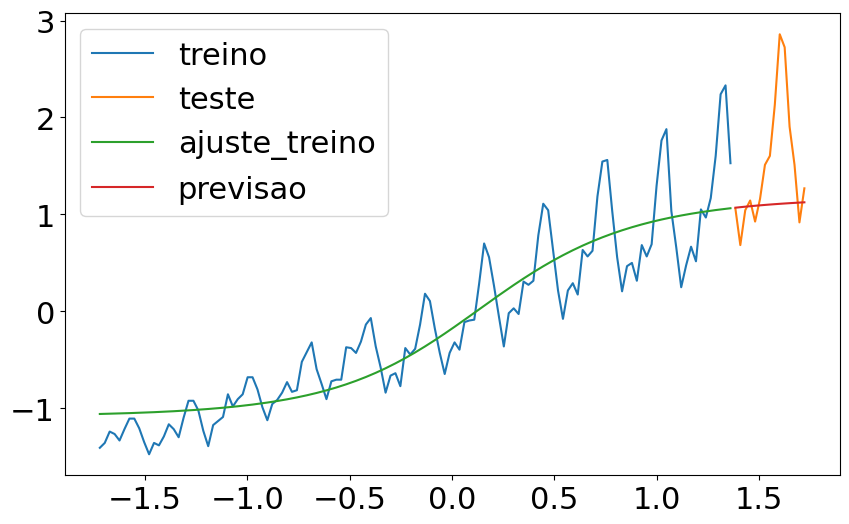

In [41]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_predict[:, 0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:, 0], label='previsao')

In [45]:
vetor = pd.DataFrame(y_treino)[0]

In [46]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [48]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [49]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [50]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [51]:
vetor2 = pd.DataFrame(y_teste)[0]

In [53]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [56]:
regressor3 = Sequential()

In [58]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [60]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

In [62]:
y_predict_novo = regressor3.predict(x_treino_novo)

4/4 [==============================] - 0s 5ms/step


<Axes: xlabel='tempo', ylabel='0'>

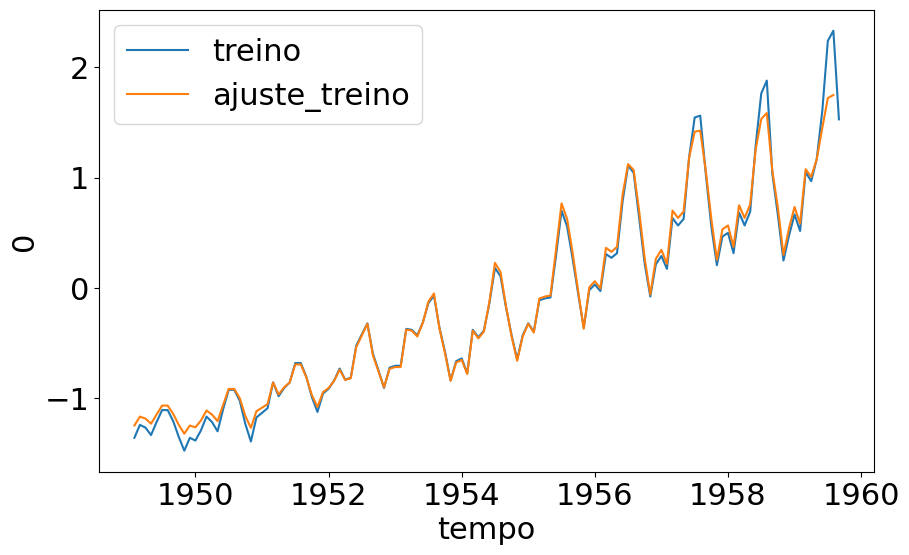

In [63]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [64]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

1/1 [==============================] - 0s 51ms/step


In [65]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

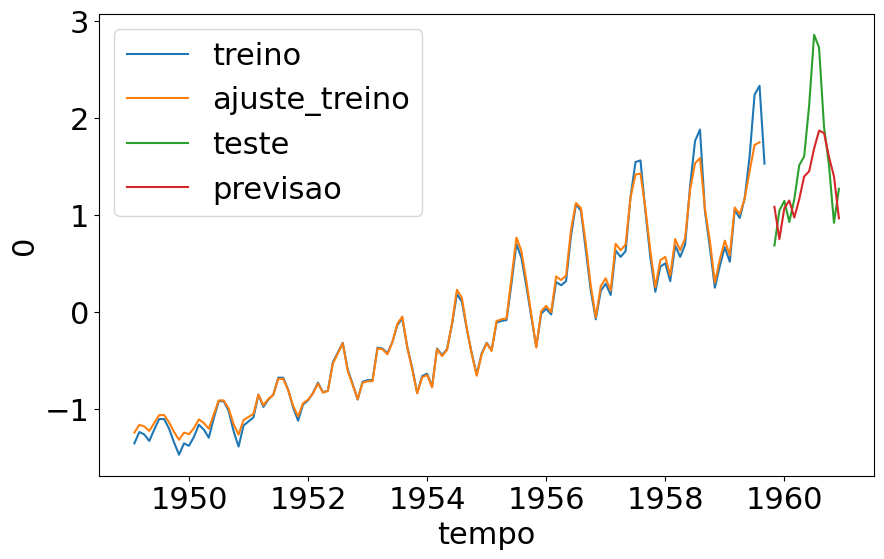

In [67]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')

In [68]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [69]:
x_treino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [70]:
y_treino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [71]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

In [72]:
regressor4 = Sequential()

In [73]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [75]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

In [77]:
y_predict_novo = regressor4.predict(x_treino_novo)

4/4 [==============================] - 0s 4ms/step


In [78]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

1/1 [==============================] - 0s 32ms/step


In [79]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [80]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

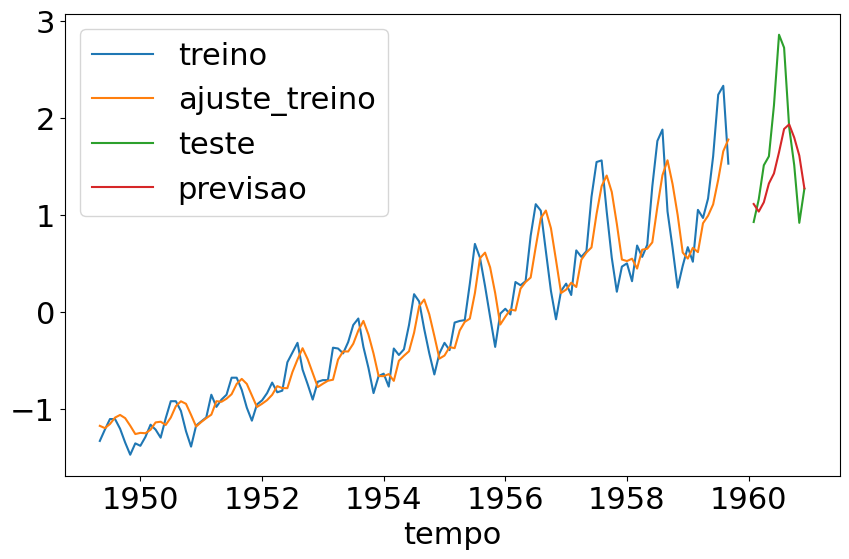

In [82]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsao')